<a href="https://colab.research.google.com/github/snakeway8/Projects/blob/main/Recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Content-Based Filtering: Suggest Similar Restaurants to a Restaurant KFC

In [217]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [218]:
rest_rating = pd.read_excel('/content/Restaurant_Ratings.xlsx',sheet_name=0)

In [219]:
restaurant_details = pd.read_excel('/content/Restaurant_Ratings.xlsx',sheet_name=1)

In [220]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


#### 1.Prep the data to contain only numeric values

In [221]:
df_dummies = pd.get_dummies(restaurant_details, columns=['Cuisine', 'Price', 'Franchise'],dtype=int)
df_dummies.head()

,Restaurant_ID,Name,Cuisine_American,Cuisine_Armenian,Cuisine_Bakery,Cuisine_Bar,Cuisine_Breakfast,Cuisine_Brewery,Cuisine_Burgers,Cuisine_Cafeteria,...,Cuisine_Mexican,Cuisine_Pizzeria,Cuisine_Regional,Cuisine_Seafood,Cuisine_Vietnamese,Price_High,Price_Low,Price_Medium,Franchise_No,Franchise_Yes
0,135069.0,Abondance Restaurante Bar,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,135016.0,Arrachela Grill,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,132754.0,Cabana Huasteca,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,132561.0,Cafe Ambar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,132572.0,Cafe Chaires,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [222]:
df_dummies.shape

(127, 28)

In [223]:
rest_df = df_dummies.iloc[:,1:].set_index('Name')
rest_df.head()

,Cuisine_American,Cuisine_Armenian,Cuisine_Bakery,Cuisine_Bar,Cuisine_Breakfast,Cuisine_Brewery,Cuisine_Burgers,Cuisine_Cafeteria,Cuisine_Chinese,Cuisine_Coffee Shop,...,Cuisine_Mexican,Cuisine_Pizzeria,Cuisine_Regional,Cuisine_Seafood,Cuisine_Vietnamese,Price_High,Price_Low,Price_Medium,Franchise_No,Franchise_Yes
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [224]:
rest_df.index.name = None

#### 2.Calculation the cosine similarities between rows

In [225]:
# calculation all the cosine similarities

cosine_matrix_all = cosine_similarity(rest_df)
cosine_all=pd.DataFrame(cosine_matrix_all,index=rest_df.index, columns=rest_df.index)
cosine_all

,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Abondance Restaurante Bar,1.000000,0.408248,0.333333,0.816497,0.666667,0.333333,0.666667,0.333333,0.000000,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333
Arrachela Grill,0.408248,1.000000,0.816497,0.500000,0.408248,0.816497,0.408248,0.816497,0.408248,0.408248,...,0.408248,0.408248,0.408248,0.000000,0.408248,0.816497,0.816497,0.408248,0.408248,0.000000
Cabana Huasteca,0.333333,0.816497,1.000000,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,...,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.666667,0.333333,0.333333,0.000000
Cafe Ambar,0.816497,0.500000,0.408248,1.000000,0.816497,0.408248,0.816497,0.408248,0.000000,0.000000,...,0.816497,0.816497,0.816497,0.408248,0.816497,0.408248,0.408248,0.816497,0.816497,0.408248
Cafe Chaires,0.666667,0.408248,0.333333,0.816497,1.000000,0.666667,1.000000,0.666667,0.000000,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tortas Hawaii,0.333333,0.816497,0.666667,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.000000
Tortas Locas Hipocampo,0.333333,0.816497,0.666667,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.000000
Tortas Y Hamburguesas El Gordo,0.666667,0.408248,0.333333,0.816497,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,1.000000,0.666667,0.333333
Unicol's Pizza,0.666667,0.408248,0.333333,0.816497,0.666667,0.333333,0.666667,0.333333,0.000000,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,1.000000,0.333333


#### 3. Identify top 10 restaurants similar to KFC

In [226]:
result_df  = cosine_all[['KFC']].sort_values(by='KFC', ascending=False)
result_df = result_df.reset_index()
result_df.columns = ['Name', 'KFC_similar']
result_df = result_df[result_df['Name'] != 'KFC']

In [227]:
top_10 = result_df.merge(restaurant_details[['Name','Cuisine','Price','Franchise']],\
                how='inner', on='Name').head(10)
top_10

,Name,KFC_similar,Cuisine,Price,Franchise
0,Vips,1.000000,American,Low,Yes
1,Tacos Los Volcanes,1.000000,American,Low,Yes
2,McDonalds Centro,1.000000,American,Low,Yes
3,Church's,0.816497,NaN,Low,Yes
4,Dairy Queen,0.816497,NaN,Low,Yes
5,Sirloin Stockade,0.816497,NaN,Low,Yes
6,Hamburguesas La Perica,0.666667,Mexican,Low,Yes
7,Pollo Frito Buenos Aires,0.666667,Fast Food,Low,Yes
8,Emilianos,0.666667,Brewery,Low,Yes
9,Subway,0.666667,Fast Food,Low,Yes


### Collaborative Filtering

In [228]:
rest_rating.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


### 1. Data Prep

In [229]:
# view the range of the ratings
rest_rating.describe()

,Restaurant_ID,Overall_Rating
count,1161.000000,1161.000000
mean,134192.041344,1.199828
std,1100.916275,0.773282
min,132560.000000,0.000000
25%,132856.000000,1.000000
50%,135030.000000,1.000000
75%,135059.000000,2.000000
max,135109.000000,2.000000


In [230]:
# pivot the data to get it into a user-item matrix format (change the NaN values to mean)
X = rest_rating.pivot_table(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').\
fillna(rest_rating['Overall_Rating'].median())
X.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
U1002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
U1003,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
U1004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
U1005,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [231]:
# center the data
X_centered = X-X.mean()
X_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.043478,0.0,-0.043478,0.007246,0.0,-0.036232,0.0,-0.036232,-0.021739,-0.007246,...,0.014493,0.0,0.0,-0.028986,0.021739,-0.007246,-1.086957,0.014493,0.014493,-0.014493
U1002,0.043478,0.0,-0.043478,0.007246,0.0,-0.036232,0.0,-0.036232,-0.021739,-0.007246,...,0.014493,0.0,0.0,-0.028986,0.021739,-0.007246,-0.086957,0.014493,0.014493,-0.014493
U1003,0.043478,0.0,0.956522,0.007246,0.0,0.963768,0.0,-0.036232,-0.021739,-0.007246,...,0.014493,0.0,0.0,-0.028986,0.021739,-0.007246,-0.086957,0.014493,0.014493,-0.014493
U1004,0.043478,0.0,-0.043478,0.007246,0.0,-0.036232,0.0,0.963768,-0.021739,-0.007246,...,0.014493,0.0,0.0,0.971014,0.021739,-0.007246,-0.086957,0.014493,0.014493,-0.014493
U1005,0.043478,0.0,-0.043478,0.007246,0.0,-0.036232,0.0,0.963768,-0.021739,-0.007246,...,0.014493,0.0,0.0,-0.028986,0.021739,-0.007246,-0.086957,0.014493,0.014493,-0.014493


In [232]:
X.shape

(138, 127)

### 2.Fit an initial TruncatedSVD model with all the components on centered data

In [233]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD
svd_127 = TruncatedSVD(n_components=127)
svd_127.fit(X_centered)

TruncatedSVD(n_components=127)

In [234]:
# the cumulative explained variance ratios
sum(svd_127.explained_variance_ratio_)

0.9999999999999993

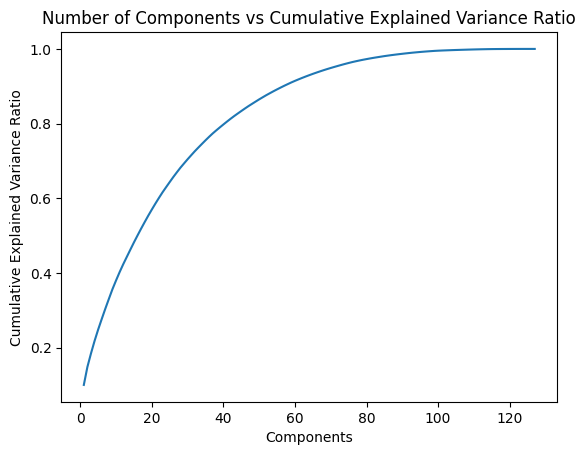

In [235]:
# plot the cumulative explained variance ratios
cum_evr127 = list(zip(range(1, 128), np.cumsum(svd_127.explained_variance_ratio_)))
cum_evr127_df = pd.DataFrame(cum_evr127).set_index(0)
cum_evr127_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

In [236]:
#Update the model to have 50 components
svd_50 = TruncatedSVD(n_components=50, random_state=42)
svd_50.fit(X_centered)

TruncatedSVD(n_components=50, random_state=42)

In [237]:
# view the cumulative explained variance ratios with 50 components
sum(svd_50.explained_variance_ratio_)

0.8648502867865052

### 3.Introduce a New User

In [238]:
# create a user-item matrix

X = rest_rating.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').fillna(rest_rating.Overall_Rating.mean())

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 2 ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
# view only the restaurants that the new user rated
new_user_df.T.dropna()

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [240]:
# the new user likes low-priced american chain restaurants
restaurant_details[restaurant_details.Name.isin(new_user_df.T.dropna().index)]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


### 4.Recommend Restaurants to the New User

In [241]:
# fill nan values with the mean rating
new_user_df_fillna = new_user_df.fillna(rest_rating['Overall_Rating'].median())
# center the data
new_user_df_centered = new_user_df_fillna- X.mean()
#transforming the Data
new_user_50d  = svd_50.transform(new_user_df_centered)
# transform the user into the latent space
new_user_recs = np.dot(new_user_50d, svd_50.components_)
recs = pd.DataFrame(new_user_recs, columns=X.columns)
recs.head()


Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,-0.30528,0.007606,-0.336082,-0.076679,-0.161239,-0.17434,-0.075717,-0.271116,-0.128668,-0.194096,...,-0.180603,-0.154734,-0.198785,-0.162072,-0.135603,-0.146868,-0.288331,-0.244158,-0.172272,-0.109763


In [242]:
top_recs = recs.T.sort_values(0, ascending=False)

top_recs.columns = ['Recommendetions']
top_recs

,Recommendetions
Restaurant_Name,
KFC,0.191234
McDonalds Centro,0.103329
Little Pizza Emilio Portes Gil,0.037205
Chaires,0.025528
Sirlone,0.012463
...,...
Don Burguers,-0.308594
Mariscos El Pescador,-0.312808
Subway,-0.332310


In [243]:
already_rated = new_user_df.T.dropna().index
already_rated

Index(['KFC', 'McDonalds Centro'], dtype='object', name='Restaurant_Name')

In [244]:
#filtr data which not include 'KFC' and 'McDonalds Centro'
top_recs = top_recs[~top_recs.index.isin(already_rated)]

In [245]:
top_recs= top_recs.reset_index()
top_recs.head(10)


,Restaurant_Name,Recommendetions
0,Little Pizza Emilio Portes Gil,0.037205
1,Chaires,0.025528
2,Sirlone,0.012463
3,Restaurante Y Pescaderia Tampico,0.007726
4,Arrachela Grill,0.007606
5,El Cotorreo,0.002143
6,Hamburguesas Saul,0.002107
7,Restaurant Wu Zhuo Yi,0.000126
8,Los Vikingos,-0.002072
9,Chilis Cuernavaca,-0.003888


In [246]:
restaurant_details.rename(columns={'Name':'Restaurant_Name'}, inplace=True)

In [247]:
result = restaurant_details.merge(top_recs,how='inner', on='Restaurant_Name').sort_values(by='Recommendetions', ascending=False)
result.head(10)

,Restaurant_ID,Restaurant_Name,Cuisine,Price,Franchise,Recommendetions
49,132667.0,Little Pizza Emilio Portes Gil,Armenian,Low,Yes,0.037205
13,132866.0,Chaires,Bakery,Medium,No,0.025528
106,132854.0,Sirlone,International,Medium,No,0.012463
99,135054.0,Restaurante Y Pescaderia Tampico,Seafood,High,No,0.007726
1,135016.0,Arrachela Grill,NaN,Medium,No,0.007606
22,132773.0,El Cotorreo,Family,Low,No,0.002143
35,132885.0,Hamburguesas Saul,Cafeteria,Low,No,0.002107
80,135044.0,Restaurant Wu Zhuo Yi,Chinese,Medium,No,0.000126
52,135011.0,Los Vikingos,NaN,Medium,Yes,-0.002072
14,134987.0,Chilis Cuernavaca,NaN,Medium,No,-0.003888


Conclusuion:
We can see that in this case, it is much more effective to use the Content-Based Filtering model compared to the Collaborative Filtering. The recommendations generated using the Content-Based Filtering are the most relevant